# K means clustering
## Introduction 

With the k-nearest neighbors algorithm, we are able to succesfuly classify an unknown datapoint given some labelled data. A more complex scenario is achieveing a classification strategy in the absence of labelled data, (i.e our training set is not labelled.) In essence, how do we draw decision boundaries in our data when we do not have labels? The k-means clustering algorithm can achieve this through an iterative optimization process. K means attempts to sort data into K distinct labels or 'clusters'. It is a type of *unsupervised learning* algorithm. We create a a fake dataset below for demonstration purposes. 

Text(0, 0.5, 'Fruit Height (cms)')

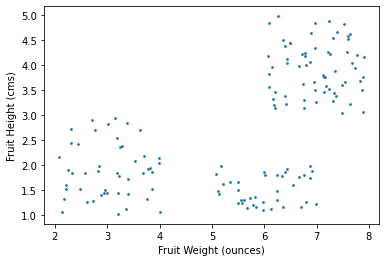

In [15]:
from matplotlib import pyplot as plt
from matplotlib import colors
import random
import pandas as pd
import numpy as np
import statistics

# Create a fake dataset of fruit weight, height, and label
fruit_weight = []
fruit_height = []

for i in range(150):
    probability = random.uniform(0,1)
    if probability < 0.33: 
        fruit_weight.append(random.uniform(2, 4))
        fruit_height.append(random.uniform(1, 3))

    elif probability > 0.33 and probability < 0.66:
        fruit_weight.append(random.uniform(6, 8))
        fruit_height.append(random.uniform(3, 5))

        
    else: 
        fruit_weight.append(random.uniform(5, 7))
        fruit_height.append(random.uniform(1, 2))
    
fruit_weight = np.asarray(fruit_weight)
fruit_height = np.asarray(fruit_height)

# Combine data into single matrix where each row represents a datapoint
# and each column represents a feature
data = np.concatenate((fruit_weight.reshape(len(fruit_weight), 1), fruit_height.reshape(len(fruit_height), 1)),axis=1)

# Plot the data        
fig, ax = plt.subplots()        
ax.scatter(data[:,0], data[:,1], s=3)
ax.set_xlabel("Fruit Weight (ounces)")
ax.set_ylabel("Fruit Height (cms)")

## Producing labels for our data

We reuse our fruit weights and heights dataset for this example. A quick glance at the data, and it's easy for people to decipher 3 distinct clusters. Our ability to perceive this natural grouping is a reflection of how well the human visual cortex has evolved to find patterns and orders very quickly. The KMC algorithm does not have the advantage of this visual intuition like we do. However, KMC is clever in its ability to infer very similar classification outputs by using a few simple steps: 

1. For K = 3 (user decided), initialize 3 random points that will represet the 'centers' of our clusters
2. Label each data point using a simple smallest euclidian distance criteria (i.e the datapoint is labelled to whichever center is closest to it.) 
3. Re-compute 3 new centers by computing the mean of the labelled data points from step 2. 
4. Repeat starting from step 2 until there is no significant change in cluster center movement (convergence)

Our euclidian distance is calculated the exact same way as was done in K nearest neighbors. For any given datapoint $b$, we compute the three distances as: 
### cluster_1_distance = $\sqrt{  \sum_{n=0}^{i} (c^1_{i} - b_{i})^2 } $
### cluster_2_distance = $\sqrt{  \sum_{n=0}^{i} (c^2_{i} - b_{i})^2 } $
### cluster_3_distance = $\sqrt{  \sum_{n=0}^{i} (c^3_{i} - b_{i})^2 } $

Here, $c^1$, $c^2$, $c^3$, represent cluster point centers 1,2 and 3 respectively. $i$ reflects the number of features we are iterating over in our summation. Upon computing these distances, point $b$ is assigned a label of 1,2 or 3 based on whichever cluster distance turns out to be the smallest. 

In [18]:
# Define a function to compute the euclidian distance given two feature vectors
def find_closest_cluster(centers,datapoint): 
    
    euclidians = np.zeros((1, len(centers))).flatten()
    
    for index, center in enumerate(centers):
        euclidian = np.sqrt(np.sum((center-datapoint)**2))
        euclidians[index] = euclidian
        
    return np.argmin(euclidians)

def create_clusters(centers): 
    
    # Initialize an empty list of lists where each list will hold the indices of the 
    # points belonging to one cluster 
    clusters = [[] for _ in range(len(centers))]
    
    for index, datapoint in data: 
        closest_cluster = find_closest_cluster(centers, datapoint)
        clusters[closest_cluster].append(index)
    
# Function to compute k nearest neighbors for 2 features (2D case) 
def k_nearest_neighbors(k, data): 
    
    '''
        k: 
            Number of clusters
        feature_1: 
            array of the first feature (weights)
        feature_2: 
            array of the second feature (heights)
    '''
    
    # Initialize random centers by first grabbing 3 random indices 
    # Replace flag ensures no duplicates are chosen
    random_centroid_indices = np.random.choice(len(data[:,0]), k, replace=False)
    
    # Grab 3 random points using those indices 
    centers = [data[indx] for indx in random_centroid_indices]
    
    
k_nearest_neighbors(3, data)
    

[array([2.08715162, 2.17121721]),
 array([5.66811636, 1.1474631 ]),
 array([7.59618612, 4.58008176])]